# Portfolio Project: Predict The Stock Market Using Machine Learning

In [1]:
import pandas as pd

In [2]:
sp500 = pd.read_csv("sp500.csv")
sp500.set_index("Date", inplace=True)

In [3]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18211 entries, 1950-01-03 to 2022-05-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18211 non-null  float64
 1   High          18211 non-null  float64
 2   Low           18211 non-null  float64
 3   Close         18211 non-null  float64
 4   Volume        18211 non-null  int64  
 5   Dividends     18211 non-null  int64  
 6   Stock Splits  18211 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.1+ MB


### Cleaning and Visualizing Our Stock Market Data

In [5]:
sp500.drop(["Dividends", "Stock Splits"], axis=1, inplace=True) # Because that two columns are not necessary

In [6]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000
2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000
2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000


### Preparing Our Target for Machnie Learning

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # Creating a column called Tomorrow, which gets its values from the next day's closing price.

In [8]:
sp500["Target"] = sp500["Tomorrow"] > sp500["Close"] # Creating a column called Target, and filling it with Boolean values based on: Is the tomorrow's price greater than today's price?

In [9]:
sp500 = sp500[pd.DatetimeIndex(sp500.index).year >= 1990] # Removing all data before 1990 because the old data maybe not helpful for us because of the market is changing

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False
...,...,...,...,...,...,...,...
2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,False
2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,False
2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,True


### Training an Initial Machine Learning Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [12]:
model = RandomForestClassifier(n_jobs=-1, warm_start=True)

In [13]:
X = sp500.drop("Target", axis=1)
y = sp500["Target"]

In [15]:
# Split data into train and test sets with respect to order of time series data. There is border at 80%

#division_limit = int(X.shape[0] * .9)

X_train = X.iloc[:-100, :]
X_test = X.iloc[-100:, :]

y_train = y[:-100]
y_test = y[-100:]

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, warm_start=True)

In [17]:
predictions = model.predict(X_test)

In [18]:
accuracy = float(precision_score(y_test, predictions))

In [19]:
actual_vs_pred = pd.DataFrame({
                            "actual": y_test,
                            "predictions": predictions
                              })

In [32]:
# Converting from Boolean to Numeric values

actual_vs_pred["actual"] = actual_vs_pred["actual"].apply(lambda x: 1 if x else 0)
actual_vs_pred["predictions"] = actual_vs_pred["predictions"].apply(lambda x: 1 if x else 0)

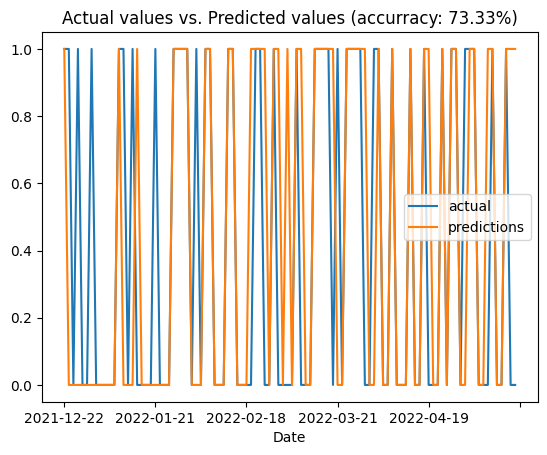

In [33]:
actual_vs_pred.plot()

plt.title(f"Actual values vs. Predicted values (accurracy: {round(accuracy * 100, 2)}%)")

plt.show()